Análisis de datos en salud
============================

Unidad 1 - Parte práctica
-----------------------------------------------------

En esta sesión vamos a explorar y trabajar con distintos tipos de datos de salud.

In [18]:
import pandas as pd
import seaborn as sns
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 1
%cd /content/drive/MyDrive/Data Health/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data Health/data


### Ejercicio 1

Para cada uno de los datasets siguientes, carga los datos en forma de DataFrame y saca su información básica:

- Tamaño (número filas y columnas).
- Nombre columnas
- Mostrar 5 primeras filas
- Métricas descriptivas para variables numéricas
- Valores únicos para variables categóricas
- ¿Qué tipos de datos son? (e.g. datos tabulares, imágenes, series temporales, etc).

A continuación, haz una breve descripción del dataset con la información obtenida (columnas importantes más importantes), comenta que preproceso sería necesario para cada dataset y sus posibles usos (tipo de análisis que se pueden hacer con estos datos).

## Datos clínicos de pacientes con diabetes

El dataset [`diabetes_prediction_dataset.csv`](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data) es una recopilación de datos médicos y demográficos de pacientes, junto con su estado de diabetes (positivo o negativo).


In [19]:
df_Diab_Pre = pd.read_csv('/content/drive/MyDrive/Data Health/data/diabetes_prediction_dataset.csv')
df_Diab_Pre.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [21]:
df_Diab_Pre.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [19]:
# df_Diab_Pre.dtypes -> dtype: object
df_Diab_Pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [28]:
# Exploración de las variables

# Variables categóricas
var_cat = ['gender', 'smoking_history']

# Mostramos valor únicos de las columnas categóricas
for var in var_cat:
  print("----", var, "----")
  print(f"Los valores únicos de la columna ´{var} son {df_Diab_Pre[var].unique()}")

---- gender ----
Los valores únicos de la columna ´gender son ['Female' 'Male' 'Other']
---- smoking_history ----
Los valores únicos de la columna ´smoking_history son ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [22]:
df_Diab_Pre.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


- `int64`: Integer values
- `float64`: Floating-point values
- `object`: String values or other object types

Información general:
- Datos tabulares
- Los datos incluyen características como edad, sexo, índice de masa corporal (IMC), hipertensión, enfermedades cardíacas, antecedentes de tabaquismo, nivel de HbA1c y nivel de glucosa en sangre.
- La variable clave es la columna diabetes, que indica si el paciente tiene (1) o no (0) diabetes. Es una columna binaria.
- No parece que haya ningún outlier en las variables numéricas.
- Las variables categóricas se deben tratar para poder usarse posteriormente en un modelo.

Posibles usos:
- Se puede utilizar para crear modelos de aprendizaje automático para predecir la diabetes en pacientes en función de su historial médico y su información demográfica.

- Puede ser útil para los profesionales de la salud a la hora de identificar pacientes que pueden estar en riesgo de desarrollar diabetes y desarrollar planes de tratamiento personalizados.

- Los investigadores pueden utilizar el conjunto de datos para explorar las relaciones entre diversos factores médicos y demográficos y la probabilidad de desarrollar diabetes.

## Datos epidemiológicos de casos de Covid-19

El dataset [`number-of-cases-of-infectious-diseases.csv`](https://www.kaggle.com/datasets/imtkaggleteam/pandemics-in-world/data) contiene información epidemiológica sobre los casos anuales de enfermedades infecciosas en distintos países.

In [22]:
# https://www.kaggle.com/datasets/imtkaggleteam/pandemics-in-world/data
df_cases_Infec_diseases = pd.read_csv('/content/drive/MyDrive/Data Health/data/number-of-cases-of-infectious-diseases.csv')
df_cases_Infec_diseases.head(5)

,Entity,Code,Year,Indicator:Number of cases of yaws reported,Total (estimated) polio cases,Reported cases of guinea worm disease in humans,"Number of new cases of rabies, in both sexes aged all ages","Number of new cases of malaria, in both sexes aged all ages","Number of new cases of hiv/aids, in both sexes aged all ages","Number of new cases of tuberculosis, in both sexes aged all ages",Number of reported smallpox cases,Reported cholera cases
0,Afghanistan,AFG,1980,NaN,6160.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1981,NaN,5859.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1982,NaN,9730.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1983,NaN,13937.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1984,NaN,3864.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_cases_Infec_diseases.columns

Index(['Entity', 'Code', 'Year', 'Indicator:Number of cases of yaws reported',
       'Total (estimated) polio cases',
       'Reported cases of guinea worm disease in humans',
       'Number of new cases of rabies, in both sexes aged all ages',
       'Number of new cases of malaria, in both sexes aged all ages',
       'Number of new cases of hiv/aids, in both sexes aged all ages',
       'Number of new cases of tuberculosis, in both sexes aged all ages',
       'Number of reported smallpox cases', 'Reported cholera cases'],
      dtype='object')

In [20]:
# df_cases_Infec_diseases.dtypes -> dtype: object
df_cases_Infec_diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10521 entries, 0 to 10520
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            10521 non-null  object 
 1   Code                                                              9393 non-null   object 
 2   Year                                                              10521 non-null  int64  
 3   Indicator:Number of cases of yaws reported                        74 non-null     float64
 4   Total (estimated) polio cases                                     7610 non-null   float64
 5   Reported cases of guinea worm disease in humans                   8428 non-null   float64
 6   Number of new cases of rabies, in both sexes aged all ages        6780 non-null   float64
 7   Number of new cases of malaria,

In [27]:
# Exploración de las variables

# Variables categóricas
var_cat = ['Entity', 'Code']

# Mostramos valor únicos de las columnas categóricas
for var in var_cat:
  print("----", var, "----")
  print(f"Los valores únicos de la columna ´{var} son {df_cases_Infec_diseases[var].nunique()}: {df_cases_Infec_diseases[var].unique()[0:10]}")

---- Entity ----
Los valores únicos de la columna ´Entity son 245: ['Afghanistan' 'Africa' 'African Region (WHO)' 'Albania' 'Algeria'
 'American Samoa' 'Americas' 'Andorra' 'Angola' 'Antigua and Barbuda']
---- Code ----
Los valores únicos de la columna ´Code son 211: ['AFG' nan 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM']


In [23]:
df_cases_Infec_diseases.describe()

,Year,Indicator:Number of cases of yaws reported,Total (estimated) polio cases,Reported cases of guinea worm disease in humans,"Number of new cases of rabies, in both sexes aged all ages","Number of new cases of malaria, in both sexes aged all ages","Number of new cases of hiv/aids, in both sexes aged all ages","Number of new cases of tuberculosis, in both sexes aged all ages",Number of reported smallpox cases,Reported cholera cases
count,10521.000000,74.000000,7610.000000,8428.000000,6780.000000,6.780000e+03,6.780000e+03,6.780000e+03,104.000000,2.967000e+03
mean,1999.301017,14088.108108,1355.919185,1187.936640,491.806626,5.605907e+06,6.169133e+04,2.147789e+05,111413.211538,1.251451e+04
std,14.432364,19382.272796,14783.232040,21048.742524,2285.029317,2.808722e+07,2.834060e+05,9.009014e+05,140974.686958,5.987943e+04
min,1920.000000,7.000000,0.000000,0.000000,0.000055,0.000000e+00,0.000000e+00,5.112979e-01,0.000000,0.000000e+00
25%,1989.000000,685.000000,0.000000,0.000000,0.015428,0.000000e+00,5.331173e+01,3.516338e+02,0.000000,1.100000e+01
50%,2000.000000,3361.000000,0.000000,0.000000,0.800959,1.802114e+01,7.202800e+02,3.507928e+03,59677.500000,2.960000e+02
75%,2011.000000,20321.250000,7.000000,0.000000,25.316913,4.917453e+05,8.605731e+03,2.474404e+04,186363.750000,3.095500e+03
max,2023.000000,80226.000000,460159.000000,892055.000000,24744.658000,2.641380e+08,3.310627e+06,8.957511e+06,632858.000000,1.227391e+06


- `int64`: Integer values
- `float64`: Floating-point values
- `object`: String values or other object types

TIPO: SERIES TEMPORALES

Información general:
- Estos datos de casos de enfermedades infecciosas se tienen que analizar como series temporales.
- Incluye enfermedades como polio, gusano de guinea, rabia, malaria, vih, tuberculosis, varicela y cólera.
- Tenemos datos de distintas enfermedades desde principios de 1920 hasta 2023. Se incluye 245 países.

Posibles usos:

- Se puede utilizar para crear modelos epidemiológicos para predecir la evolución de estas enfermedades.  

- Puede ser útil para los profesionales de la salud a la hora de identificar patrones y tendencias de augmento/disminución de estas enfermedades. Después se podrían explorar las relaciones entre los casos y los factores demográficos y sociales.


## Datos de informes médicos

El dataset [`Independent_Medical_Reviews.csv`](https://www.kaggle.com/datasets/prasad22/ca-independent-medical-review/data) contiene información sobre las decisiones de Revisiones Médicas Independientes (IMR) administradas por el Departamento de Atención Médica Administrada de California (DMHC).

In [24]:
df_Med_Reviews = pd.read_csv('/content/drive/MyDrive/Data Health/data/Independent_Medical_Reviews.csv')
df_Med_Reviews.head(5)

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [25]:
df_Med_Reviews.columns

Index(['Reference ID', 'Report Year', 'Diagnosis Category',
       'Diagnosis Sub Category', 'Treatment Category',
       'Treatment Sub Category', 'Determination', 'Type', 'Age Range',
       'Patient Gender', 'Findings'],
      dtype='object')

In [21]:
# df_Med_Reviews.dtypes -> dtype: object
df_Med_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19245 non-null  object
 1   Report Year             19245 non-null  int64 
 2   Diagnosis Category      19186 non-null  object
 3   Diagnosis Sub Category  17341 non-null  object
 4   Treatment Category      18795 non-null  object
 5   Treatment Sub Category  17977 non-null  object
 6   Determination           19245 non-null  object
 7   Type                    19245 non-null  object
 8   Age Range               18035 non-null  object
 9   Patient Gender          18035 non-null  object
 10  Findings                19225 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB


In [24]:
df_Med_Reviews.describe()

,Report Year
count,19245.000000
mean,2009.662977
std,4.272045
min,2001.000000
25%,2007.000000
50%,2010.000000
75%,2014.000000
max,2016.000000


In [26]:
# Exploración de las variables

# Variables categóricas
var_cat = ['Diagnosis Category',
       'Diagnosis Sub Category', 'Treatment Category',
       'Treatment Sub Category', 'Determination', 'Type', 'Age Range',
       'Patient Gender', 'Findings']

# Mostramos valor únicos de las columnas categóricas
for var in var_cat:
  print("----", var, "----")
  print(f"Los valores únicos de la columna ´{var} son {df_Med_Reviews[var].nunique()}: {df_Med_Reviews[var].unique()[0:10]}")

---- Diagnosis Category ----
Los valores únicos de la columna ´Diagnosis Category son 29: ['Infectious' 'Mental' 'Autism Spectrum' 'Prevention/Good Health'
 'Cardiac/Circulatory' 'OB-Gyn/ Pregnancy'
 'Digestive System/ Gastrointestinal' 'Orthopedic/ Musculoskeletal'
 'Central Nervous System/ Neuromuscular' 'Endocrine/ Metabolic']
---- Diagnosis Sub Category ----
Los valores únicos de la columna ´Diagnosis Sub Category son 278: ['Hepatitis' 'Eating Disorder' 'Autism-PDD-NOS' nan
 'Female Breast Disorder' 'Other' 'Fracture' 'Depression - Severe'
 'Diabetes' 'Lipid Storage Disease']
---- Treatment Category ----
Los valores únicos de la columna ´Treatment Category son 31: ['Pharmacy/Prescription Drugs' 'Mental Health Treatment'
 'Autism Related Treatment' 'Diagnostic Imaging, Screening and Testing'
 'Cardio Vascular' 'Durable Medical Equipment'
 'Diagnostic/Physician Evaluation' 'Orthopedic' 'Emergency/Urgent Care'
 'General Surgery']
---- Treatment Sub Category ----
Los valores únicos de 

- `int64`: Integer values
- `object`: String values or other object types

TIPO: TEXTO

Información general:
- Una IMR es una revisión independiente de un servicio de atención médica denegado, retrasado o modificado que el plan de salud ha determinado que no es médicamente necesario. Si en la IMR se decide a favor de un caso, el plan de salud debe autorizar el servicio o tratamiento solicitado.
- La variable `Determination` indica si la propuesta se aprobó o no.
- En la columna `Findings` hay el informe que se hizo después de la evaluación de la IMR.
- Para cada caso hay información sobre el diagnóstico, el tratamiendo y el paciente.

Posibles usos:
- Se puede crear un modelo que, a partir de las características de cada caso, haga una predicción del status de la propuesta.

- Se puede sacar información de los informes con técnicas de NLP. Por ejemplo, se puede crear un modelo que haga un resumen de los puntos esenciales del informe. También se pueden usar técnicas supervisadas para predecir el estatus de caso según el texto del informe.
- Se pueden identificar relaciones entre los distintos diagnósticos y tratamientos con el aprobado/rechazo de los casos.


## Imágenes médicas (Opcional)

El conjunto de datos BCSS, derivado de TCGA, incluye más de 20.000 anotaciones de segmentación de regiones de tejido de cáncer de mama. En este ejemplo, se han seleccionado 2 imágenes con sus respectivas máscaras.

Las anotaciones de las máscaras que se encuentran en el fichero [`gtruth_df.csv`](https://www.kaggle.com/datasets/whats2000/breast-cancer-semantic-segmentation-bcss) han sido revisadas por patólogos, residentes y estudiantes de medicina.

- Por segmentacion
-

In [6]:
# Cargamos librerías standard
import pandas as pd
import numpy as np

# Cargamos librerías la visualización
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

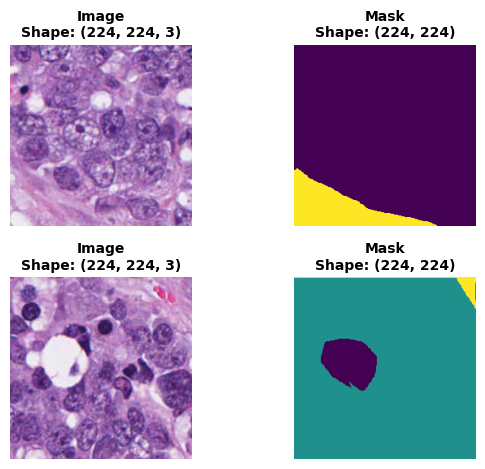

In [12]:
# Mostrar una imágen con su respectiva máscara

fig, ax = plt.subplots(nrows = 2, ncols = 2)

img_path = "/content/drive/MyDrive/Data Health/data/img/cell1.png"
mask_path = "/content/drive/MyDrive/Data Health/data/img/cell1_mask.png"

img2_path = "/content/drive/MyDrive/Data Health/data/img/cell2.png"
mask2_path = "/content/drive/MyDrive/Data Health/data/img/cell2_mask.png"

img_bgr = cv2.imread(str(img_path))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
ax[0][0].imshow(img_rgb)
ax[0][0].axis('off')
ax[0][0].set_title(f"Image\nShape: {img_rgb.shape}", fontsize = 10, fontweight = "bold", color = "black")

mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
ax[0][1].imshow(mask)
ax[0][1].axis('off')
ax[0][1].set_title(f"Mask\nShape: {mask.shape}", fontsize = 10, fontweight = "bold", color = "black")

img_bgr = cv2.imread(str(img2_path))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
ax[1][0].imshow(img_rgb)
ax[1][0].axis('off')
ax[1][0].set_title(f"Image\nShape: {img_rgb.shape}", fontsize = 10, fontweight = "bold", color = "black")

mask = cv2.imread(str(mask2_path), cv2.IMREAD_GRAYSCALE)
ax[1][1].imshow(mask)
ax[1][1].axis('off')
ax[1][1].set_title(f"Mask\nShape: {mask.shape}", fontsize = 10, fontweight = "bold", color = "black")

fig.tight_layout()
fig.show()

In [10]:
gtruth_df = pd.read_csv('/content/drive/MyDrive/Data Health/data/img/gtruth_codes.csv', sep=';')

gtruth_df.head(5)

,label,GT_code
0,outside_roi,0
1,tumor,1
2,stroma,2
3,lymphocytic_infiltrate,3
4,necrosis_or_debris,4


In [11]:
# size
print("Tamaño df:\n", gtruth_df.shape)

# Column names
print("Columnas del df:\n", gtruth_df.columns)

Tamaño df:
 (22, 2)
Columnas del df:
 Index(['label', 'GT_code'], dtype='object')


Información general:

- Las imágenes son a color (3 canales RGB) y tienen un tamaño de 224x224.
- Para cada imagen tenemos una máscara que indica el tipo de tejido de cada píxel. Hay 4 tipos de tejido anómalo.
- Es un proceso supervisado que requiere de un proceso de etiquetaje previo.

Posibles usos:

- Estas imágenes pueden usarse para el desarrollo de modelos de aprendizaje automático para la segmentación de tejidos con mayor eficiencia computacional.

### Datos genómicos (Opcional)

La información de las secuencias de aminoácidos y proteinas se representan usando el formato estándar FASTA. En este caso, vamos a cargar una secuencia de aminoácidos `rcsb_pdb_4D2I.fasta` usando la librería Biopython,  que proporciona herramientas y funcionalidades para el análisis y manipulación de datos biológicos. Vamos a ver la estructura cristalina de la enzima HerA, una helicasa hexamérica que participa en procesos de replicación y reparación del ADN en organismos procariotas.

- SEQUENCIA DE TEXTO

In [13]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.9 MB/s eta 0:00:00


In [14]:
import Bio
from Bio import SeqIO
for seq_record in SeqIO.parse("/content/drive/MyDrive/Data Health/data/rcsb_pdb_4D2I.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

4D2I_1|Chains
Seq('MIIGYVIGQATTQEALILAERPVRLGTYVVLEYDNVKALGLITNVTRGSPLLDD...IGD')
500


In [16]:
# OR
from Bio import SeqIO
from Bio.Seq import Seq

archivo_fasta = "data/rcsb_pdb_4D2I.fasta"

# Cargar la secuencia de aminoácidos desde el archivo FASTA
for secuencia in SeqIO.parse("/content/drive/MyDrive/Data Health/data/rcsb_pdb_4D2I.fasta", "fasta"):
    secuencia_aa = secuencia.seq

# Imprimir la secuencia de aminoácidos (AA)
print("Secuencia de aminoácidos:")
print(secuencia_aa)

Secuencia de aminoácidos:
MIIGYVIGQATTQEALILAERPVRLGTYVVLEYDNVKALGLITNVTRGSPLLDDNMNDIEIVQRLKQFNNSIPVYTKAKVKLLCDMNNHFLMPDIPPFAGTPAREAEDEELKSIYSQDGQIRIGSLIGKNVEVKLNINSFARHLAILAATGSGKSNTVAVLSQRISELGGSVLIFDYHGEYYDSDIKNLNRIEPKLNPLYMTPREFSTLLEIRENAIIQYRILRRAFIKVTNGIRAALAAGQIPFSTLNSQFYELMADALETQGNSDKKSSAKDEVLNKFEEFMDRYSNVIDLTSSDIIEKVKRGKVNVVSLTQLDEDSMDAVVSHYLRRILDSRKDFKRSKNSGLKFPIIAVIEEAHVFLSKNENTLTKYWASRIAREGRKFGVGLTIVSQRPKGLDENILSQMTNKIILKIIEPTDKKYILESSDNLSEDLAEQLSSLDVGEAIIIGKIVKLPAVVKIDMFEGKLLGSDPDMIGEWKKVAASEKIAKGFADFGTEIGD


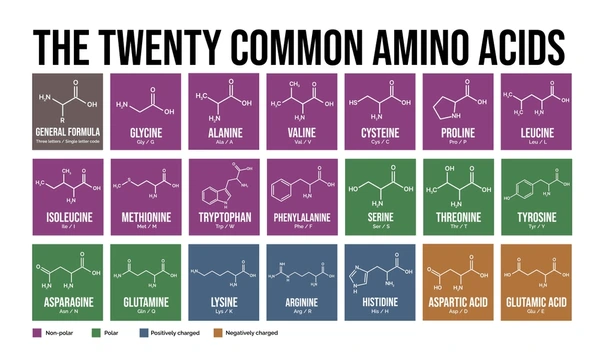

Información general:
- En la secuencia, cada letra representa un aminoácido (e.g. A = Alanine, L = Leucine).


Posibles usos:

- Con biopython se pueden obtener propiedades bioquímicas y físicas de las secuencias.
- Con algoritmos de aprendizaje profundo se puede intentar predecir la secuencia de aminoácidos.